# Doubly constrained algorithm

## Attracted and generated trips

In [1]:
#om <- c(98,106,122) #Generated trips by zone
om <- c(100,200,250)
#om <- c(35155,12000,22647); om <- round(om)

In [2]:
#dm <- c(102,118,106) #Attracted trips by zone
dm <- c(220,165,165)
#dm <- round(rep(1/length(om),length(om)-1)*sum(om)); dm <- c(dm,sum(om)-sum(dm))

In [3]:
nZones <- length(om) #Number of zones

In [4]:
T <- sum(om) #Total trips

## Cost matrix

In [5]:
#cij <- matrix(c(1.0,1.2,1.8,1.2,1.0,1.5,1.8,1.5,1.0),3,3)
cij <- matrix(c(1,3,2,3,1,2,3,1,1),3,3)

In [6]:
cij

1,3,3
3,1,1
2,2,1


## Impedance function

In [7]:
#fcij <- function(c){1/c^2}
fcij <- function(c){5*exp(-0.5*c)}

In [8]:
fcij(cij)

3.032653,1.115651,1.115651
1.115651,3.032653,3.032653
1.839397,1.839397,3.032653


## Balancing factors

In [9]:
ai <- function(bj,dj,fcij,cij){
    
    nZones <- length(bj)
    ai <- c(rep(NA,nZones))
       
     for(i in 1:nZones){
        sum <- 0
       
        for(j in 1:nZones){
           sum  <- sum + bj[j]*dj[j]*fcij(cij)[i,j]
        }
        ai[i] <- 1/sum     
    }
    
    return(ai)
}

In [10]:
bj <- function(ai,oi,fcij,cij){
    
    nZones <- length(ai)
    bj <- c(rep(NA,nZones))
       
     for(i in 1:nZones){
        sum <- 0
       
        for(j in 1:nZones){
           sum  <- sum + ai[j]*oi[j]*fcij(cij)[j,i]
        }
        bj[i] <- 1/sum       
    }
    
    return(bj)
}

## OD Matrix

In [11]:
ODMatrix <- function(ai,bj,oi,dj,fcij,cij){
    
    nZones <- length(ai)
    odmatrix <- diag(nZones)*0
    
    for(i in 1:nZones){
        for(j in 1:nZones){
           odmatrix[i,j] <- ai[i]*bj[j]*oi[i]*dj[j]*fcij(cij)[i,j]
        }     
    }
    
    return(odmatrix)
    
}

# Compute the number of generated trips by zone

on <- function(odm){
    
    return(rowSums(odm))
}


# Compute the number of attracted trips by zone


dn <- function(odm){
    
    return(colSums(odm))
}


## Function for entropy calculation

In [12]:
entropyCalculation <- function(m){
    
    #total trips in matrix
    trips_m <- sum(m)
    numerator <- factorial(trips_m)
    
    
    denominator <- 1
    
    for(i in 1:dim(m)[1]){
        
        for(j in 1:dim(m)[2]){
    
            denominator <- denominator*factorial(m[i,j])    
            

        }
    }
    
    entropym <- numerator/denominator
    
    return(entropym)
    
}

## General algorithm for n iterations

In [13]:
doublyConstrainedAlgorithm <- function(om,dm,cij,fcij,nIterations){

    nZones <- length(om) #Number of zones
    
    an <- c(rep(NA,nZones))
    bn <- c(rep(NA,nZones))
    ODn <- diag(nZones)*0
    
    an1 <- an
    bn1 <- bn
    ODn1 <- ODn
    
    
    for(i in 1:nIterations){
        
        if(i==1){
            an <- ai(bj = c(rep(1,nZones)),dj = dm,fcij = fcij, cij = cij)
            bn <- bj(ai = an,oi = om,fcij = fcij, cij = cij)
            ODn <- ODMatrix(ai=an,bj=bn,oi=om,dj=dm,fcij=fcij,cij=cij)
            
        }
        
        else{
            
            an1 <- ai(bj = bn,dj = d1,fcij = fcij, cij = cij)
            bn1 <- bj(ai = an1,oi = om,fcij = fcij, cij = cij)
            ODn1 <- ODMatrix(ai=an1,bj=bn1,oi=om,dj=dm,fcij=fcij,cij=cij)
            
            error <- sum(abs(ODn1-ODn))
            
            an <- an1
            bn <- bn1
            ODn <- ODn1
            
        }
        
        
    }
    
#    return(list(ODMatrix=ODn,oi=on(ODn),dj=dn(ODn),entropy = entropyCalculation(ODn)))
        return(list(ODMatrix=ODn,oi=on(ODn),dj=dn(ODn),cij = cij,C = sum(fcij(cij)*ODn),error = error))
    
}

## Iterations

### Iteration 1

#### Balancing factors

In [14]:
a1 <- ai(bj = c(rep(1,nZones)),dj = dm,fcij = fcij, cij = cij); a1

[1] 0.0009658584 0.0008024273 0.0008274339

In [15]:
b1 <- bj(ai = a1,oi = om,fcij = fcij, cij = cij); b1

[1] 1.173087 1.025696 0.818476

#### OD Matrix

In [16]:
OD1 <- ODMatrix(ai=a1,bj=b1,oi=om,dj=dm,fcij=fcij,cij=cij); OD1

75.59428,18.23662,14.55230
46.20795,82.36848,65.72769
98.19776,64.39490,84.72001


#### Attracted and generated trips by zone

In [17]:
o1 <- on(OD1); o1

[1] 108.3832 194.3041 247.3127

In [18]:
d1 <- dn(OD1); d1

[1] 220 165 165

### Iteration 2

In [19]:
a2 <- ai(bj = b1,dj = dm,fcij = fcij, cij = cij); a2

[1] 0.0008911513 0.0008259499 0.0008364249

In [20]:
b2 <- bj(ai = a2,oi = om,fcij = fcij, cij = cij); b2

[1] 1.1916408 1.0152133 0.8100236

In [21]:
OD2 <- ODMatrix(ai=a2,bj=b2,oi=om,dj=dm,fcij=fcij,cij=cij); OD2

70.85040,16.65409,13.28805
48.31478,83.91656,66.95577
100.83482,64.42935,84.75617


In [22]:
o2 <- on(OD2); o2

[1] 100.7925 199.1871 250.0203

In [23]:
d2 <- dn(OD2); d2

[1] 220 165 165

### Iteration (N=10)

In [24]:
N=6
doublyConstrainedAlgorithm(om=om,dm=dm,cij=cij,fcij=fcij,nIterations=N)

70.35896,16.48444,13.15670
48.62752,84.18330,67.18907
101.01351,64.33226,84.65424
1,3,3
3,1,1
2,2,1


### Analysis of convergency

In [25]:
nConvergency <- 10 #iterations

#Compute error from the second iterations until de nth iteration
convergency <- data.frame(iteration=2:nConvergency, error = sapply(2:nConvergency,function(i) doublyConstrainedAlgorithm(om=om,dm=dm,cij=cij,fcij=fcij,nIterations=i)$error))
convergency$error <- round(convergency$error,4)                                                        

### Plot

iteration,error
2,15.1813
3,1.7678
4,0.1921
5,0.0207
6,0.0022
7,0.0002
8,0.0000
9,0.0000
10,0.0000


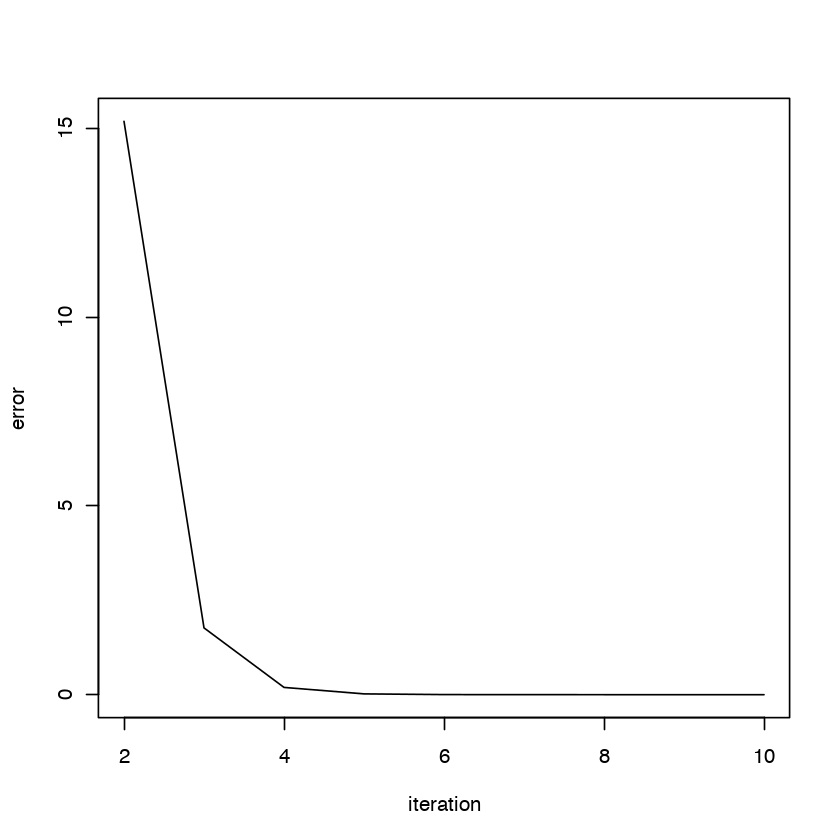

In [26]:
plot(convergency, type="l")
convergency